<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Preliminary-EDA" data-toc-modified-id="Preliminary-EDA-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Preliminary EDA</a></span></li></ul></li><li><span><a href="#Getting-datasets-ready" data-toc-modified-id="Getting-datasets-ready-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting datasets ready</a></span></li><li><span><a href="#Pre-processing-Original-Data" data-toc-modified-id="Pre-processing-Original-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pre-processing Original Data</a></span><ul class="toc-item"><li><span><a href="#Joining-dataframes" data-toc-modified-id="Joining-dataframes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Joining dataframes</a></span></li><li><span><a href="#Preping-dataset" data-toc-modified-id="Preping-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preping dataset</a></span></li></ul></li><li><span><a href="#Data-Pre-Processing" data-toc-modified-id="Data-Pre-Processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Pre-Processing</a></span><ul class="toc-item"><li><span><a href="#Sin-transformation-for-date" data-toc-modified-id="Sin-transformation-for-date-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sin transformation for date</a></span></li><li><span><a href="#Standardize-Numerical-Variables" data-toc-modified-id="Standardize-Numerical-Variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Standardize Numerical Variables</a></span></li><li><span><a href="#Changing-Binary-Variables-to-0-&amp;-1" data-toc-modified-id="Changing-Binary-Variables-to-0-&amp;-1-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Changing Binary Variables to 0 &amp; 1</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Univariate-feature-selection" data-toc-modified-id="Univariate-feature-selection-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Univariate feature selection</a></span></li></ul></li></ul></div>

In [142]:
from __future__ import division
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
import seaborn as sns
from math import sqrt, sin
from datetime import datetime
%matplotlib inline

In [143]:
# Load the data (will take a short while)
calendar = pd.read_csv("airbnb_data/calendar.csv")
demographics = pd.read_csv("airbnb_data/demographics.csv")
econ_state = pd.read_csv("airbnb_data/econ_state.csv")
listings = pd.read_csv("airbnb_data/listings.csv")
real_estate = pd.read_csv("airbnb_data/real_estate.csv")
venues = pd.read_csv("airbnb_data/venues.csv")

In [144]:
dataset_names = ["calendar", "demographics", "econ_state", "listings", "real_estate", "venues"]
datasets = [calendar, demographics, econ_state, listings, real_estate, venues]

## Preliminary EDA

In [145]:
for i in range(len(datasets)):
    print(dataset_names[i])
    print(datasets[i].keys())
    print()

calendar
Index(['listing_id', 'date', 'available', 'price', 'metro_area'], dtype='object')

demographics
Index(['zipcode', '5_years_or_less', '5-9_years', '10-14_years', '15-19_years',
       '20-24_years', '25-34_years', '35-44_years', '45-54_years',
       '55-59_years', '60-64_years', '65-74_years', '75-84_years',
       '85_years_or_more', 'households', '$9,999_or_less', '$10,000-$14,999',
       '$15,000-$24,999', '$25,000-$34,999', '$35,000-$49,999',
       '$50,000-$64,999', '$65,000-$74,999', '$75,000-$99,999',
       '$100,000_or_more', 'median_household_income', 'mean_household_income'],
      dtype='object')

econ_state
Index(['state', '2005Q1_gdp', '2005Q2_gdp', '2005Q3_gdp', '2005Q4_gdp',
       '2006Q1_gdp', '2006Q2_gdp', '2006Q3_gdp', '2006Q4_gdp', '2007Q1_gdp',
       ...
       '2016/03_ur', '2016/04_ur', '2016/05_ur', '2016/06_ur', '2016/07_ur',
       '2016/08_ur', '2016/09_ur', '2016/10_ur', '2016/11_ur', '2016/12_ur'],
      dtype='object', length=519)

listings
In

In [146]:
# demographics[demographics["zipcode"] // 1000 == 10]

In [147]:
# calendar.plot(x="date", y="price")
# plt.show()

# Getting datasets ready

In [148]:
calendar = calendar.set_index("listing_id")
listings = listings.set_index("id")

In [149]:
print(calendar['metro_area'].unique())
print(listings['state'].unique())

['NYC' 'denver' 'chicago' 'boston' 'dc']
['NY' 'MP' 'NJ' 'VT' 'CO' 'IL' 'MA' 'DC' 'MD']


In [150]:
calendar = calendar[calendar['metro_area'] == 'NYC']
listings = listings[listings['state'] == 'NY']

In [151]:
print('max:', max(calendar['date']))
print('min:', min(calendar['date']))

max: 2018-05-04
min: 2017-05-02


In [152]:
calendar.shape

(14874845, 4)

In [153]:
calendar = calendar.sample(frac=0.3, replace=True, random_state=1)

In [154]:
calendar.shape

(4462454, 4)

# Pre-processing Original Data

In [155]:
calendar_new = calendar.rename({"price": "listed price"}, axis='columns')
listings_new = listings.rename({"price": "original price"}, axis = 'columns')

## Joining dataframes

In [156]:
df = calendar_new.join(listings_new)

In [157]:
calendar_new.shape

(4462454, 4)

In [158]:
listings_new.shape

(40738, 28)

In [159]:
df.shape

(4462454, 32)

In [160]:
del(calendar)
del(listings)

## Preping dataset

In [161]:
#Getting list of column headers
features_list = df.columns.tolist()
print(features_list)

['date', 'available', 'listed price', 'metro_area', 'accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability', 'host_id', 'instant_bookable', 'latitude', 'longitude', 'metropolitan', 'name', 'original price', 'property_type', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value', 'room_type', 'state', 'weekly_price', 'zipcode']


In [231]:
df = df.drop(columns='has_availability')

In [245]:
df = df.dropna()

In [246]:
df.shape

(35337, 152)

In [162]:
len(features_list)

32

In [163]:
df.dtypes

date                            object
available                       object
listed price                   float64
metro_area                      object
accommodates                   float64
amenities                       object
availability_30                float64
bathrooms                      float64
bed_type                        object
bedrooms                       float64
beds                           float64
cancellation_policy             object
city                            object
has_availability               float64
host_id                        float64
instant_bookable                object
latitude                       float64
longitude                      float64
metropolitan                    object
name                            object
original price                 float64
property_type                   object
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location   

In [164]:
df.nunique()

date                             368
available                          2
listed price                    1372
metro_area                         1
accommodates                      16
amenities                      35125
availability_30                   31
bathrooms                         15
bed_type                           5
bedrooms                          11
beds                              16
cancellation_policy                6
city                              85
has_availability                   0
host_id                        34288
instant_bookable                   2
latitude                       40737
longitude                      40737
metropolitan                       1
name                           39892
original price                   583
property_type                     27
review_scores_checkin              9
review_scores_cleanliness          9
review_scores_communication        9
review_scores_location             9
review_scores_rating              52
r

In [165]:
#List of different types of features
id_list = ['host_id',]
target_list = ['available',]
flag_list = ['amenities', 'has_availability', 'latitude', 'longitude', 'name', 'zipcode', 'state', 'metropolitan', 'metro_area'] # flag to remove
num_list = [col for col in df.columns if df[col].nunique()>8 and col not in id_list and col not in flag_list]
cat_list = [col for col in df.columns if df[col].nunique()<=8 and col not in target_list and col not in flag_list]
transfer = ['property_type', 'city'] #has >8 unique but is catergorical var
for x in (id_list + target_list + flag_list):
    features_list.remove(x)
features_list

['date',
 'listed price',
 'accommodates',
 'availability_30',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'cancellation_policy',
 'city',
 'instant_bookable',
 'original price',
 'property_type',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'room_type',
 'weekly_price']

In [201]:
num_list.remove('date')
features_list.remove('date')

In [167]:
print(len(num_list))
print(len(cat_list))

16
4


In [168]:
for x in transfer:
    print(x)
    num_list.remove(x)
    cat_list.append(x)

property_type
city


In [169]:
print(len(num_list))
print(len(cat_list))

14
6


# Data Pre-Processing

## Sin transformation for date

In [132]:
# df['date'] = pd.to_datetime(df['date'])

In [133]:
# print('max:', max(df['date']))
# print('min:', min(df['date']))

max: 2018-05-04 00:00:00
min: 2017-05-02 00:00:00


In [134]:
# date_format = "%Y-%m-%d"
# start = datetime.strptime('2017-05-05', date_format)

In [135]:
# df.shape

(4462454, 33)

In [136]:
# # Sin transformation
# df['days_from_5May'] = np.sin(((df['date'] - start).dt.days) / 365 * 360)

In [137]:
# num_list.append('days_from_5May')

In [138]:
# print(num_list)
# print(cat_list)

['listed price', 'accommodates', 'availability_30', 'bathrooms', 'bedrooms', 'beds', 'original price', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value', 'weekly_price', 'days_from_5May', 'days_from_5May']
['bed_type', 'cancellation_policy', 'instant_bookable', 'room_type', 'property_type', 'city']


## Standardize Numerical Variables

In [172]:
# Load libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scaling Numerical Columns
# Standardize features: Z-index
scaler = MinMaxScaler()
num_std = scaler.fit_transform(df[num_list])
num_std = pd.DataFrame(num_std, columns = num_list)

In [173]:
# #Merging scaled numerical data with catergorical data
df_old = df.copy()
df = df.drop(columns = num_list)
df = df.merge(num_std, left_index=True, right_index=True, how='left')

## Changing Binary Variables to 0 & 1

In [187]:
# dropping incomplete rows
for name in cat_list:
    df = df[df['name'].notna()]

In [188]:
df.shape

(4456804, 32)

In [189]:
for name in cat_list:
    print(name)
    print(df[name].unique())

bed_type
['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']
cancellation_policy
['strict' 'moderate' 'flexible' 'super_strict_30' 'no_refunds' 'long_term']
instant_bookable
['f' 't']
room_type
['Private room' 'Entire home/apt' 'Shared room']
property_type
['Apartment' 'Other' 'Bed & Breakfast' 'House' 'Condominium' 'Loft'
 'Townhouse' 'Guest suite' 'Boutique hotel' 'Villa' 'Cabin' 'Dorm'
 'Timeshare' 'Boat' 'Guesthouse' 'Chalet' 'Hostel' 'Tent' 'In-law'
 'Castle' 'Bungalow' 'Hut' 'Vacation home' 'Cave' 'Earth House'
 'Serviced apartment' 'Lighthouse']
city
['new york' 'brooklyn' 'queens' 'greenpoint' 'sunnysidebronx'
 'staten island' 'astoria' 'long island city' 'woodside' 'jamaica'
 'wadsworth terrace' 'richmond hill' 'east elmhurst' 'manhattan'
 'riverdale' 'briarwood' 'kips bay' 'jackson heights' 'flushing'
 'park slope' 'kew gardens' 'bellerose' nan 'williamsburg' 'bushwick'
 'lower east side' 'arverne' 'rockaway beach' 'fort greene' 'whitestone'
 'east williamsburg' 'far rockaw

In [192]:
df[cat_list].nunique()

bed_type                5
cancellation_policy     6
instant_bookable        2
room_type               3
property_type          27
city                   85
dtype: int64

In [193]:
#Processing Binary Catergorical Variables
for name in ['instant_bookable']:
    df[name] = df[name].map(lambda x: 1 if x=='t' else 0)

In [194]:
cat_list

['bed_type',
 'cancellation_policy',
 'instant_bookable',
 'room_type',
 'property_type',
 'city']

In [197]:
#Columns with non_binary categorical variables
df = pd.get_dummies(data = df, columns = ['bed_type','cancellation_policy','room_type','property_type', 'city'])

In [198]:
df.dtypes

date                            object
available                       object
metro_area                      object
amenities                       object
has_availability               float64
host_id                        float64
instant_bookable                 int64
latitude                       float64
longitude                      float64
metropolitan                    object
name                            object
state                           object
zipcode                         object
listed price                   float64
accommodates                   float64
availability_30                float64
bathrooms                      float64
bedrooms                       float64
beds                           float64
original price                 float64
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location         float64
review_scores_rating           float64
review_scores_value      

In [199]:
df.describe()

,has_availability,host_id,instant_bookable,latitude,longitude,listed price,accommodates,availability_30,bathrooms,bedrooms,...,city_staten island,city_statenisland,city_sunnysidebronx,city_valley stream,city_wadsworth terrace,city_whitestone,city_williamsburg,city_williamsburg bk,city_woodside,city_yonkers
count,0.0,4.456804e+06,4.456804e+06,4.456804e+06,4.456804e+06,130546.000000,332297.000000,332297.000000,329818.000000,331297.000000,...,4.456804e+06,4.456804e+06,4.456804e+06,4.456804e+06,4.456804e+06,4.456804e+06,4.456804e+06,4.456804e+06,4.456804e+06,4.456804e+06
mean,NaN,3.057361e+07,1.964812e-01,4.073075e+01,-7.395595e+01,0.024430,0.124329,0.251569,0.173328,0.131861,...,6.223967e-03,2.445699e-05,1.607004e-02,4.554833e-05,2.580324e-05,7.583910e-05,1.447225e-04,2.423261e-05,1.298688e-03,5.272837e-05
std,NaN,3.268390e+07,3.973366e-01,5.370884e-02,4.120934e-02,0.038947,0.116895,0.342552,0.060496,0.075753,...,7.864624e-02,4.945341e-03,1.257450e-01,6.748798e-03,5.079624e-03,8.708235e-03,1.202920e-02,4.922604e-03,3.601392e-02,7.261240e-03
min,NaN,7.200000e+01,0.000000e+00,4.049979e+01,-7.424084e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,4.847926e+06,0.000000e+00,4.069231e+01,-7.398393e+01,0.010700,0.066667,0.000000,0.153846,0.111111,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,1.801913e+07,0.000000e+00,4.072409e+01,-7.395721e+01,0.016984,0.066667,0.066667,0.153846,0.111111,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,4.664434e+07,0.000000e+00,4.076449e+01,-7.394048e+01,0.028023,0.200000,0.400000,0.153846,0.111111,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,NaN,1.284849e+08,1.000000e+00,4.091216e+01,-7.371175e+01,1.000000,1.000000,1.000000,1.000000,0.777778,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [207]:
features_list = df.columns.tolist()

In [214]:
for x in (id_list + target_list + flag_list):
    if x in features_list:
        features_list.remove(x)
features_list.remove('date')

In [215]:
len(features_list)

141

In [252]:
for name in features_list:
    if max(df[name] == 0):
        df.drop(columns = name)
        features_list.remove(name)

In [253]:
len(features_list)

74

In [254]:
print(features_list)

['listed price', 'availability_30', 'bedrooms', 'original price', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value', 'weekly_price', 'bed_type_Couch', 'bed_type_Pull-out Sofa', 'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'room_type_Entire home/apt', 'room_type_Shared room', 'property_type_Bed & Breakfast', 'property_type_Boutique hotel', 'property_type_Cabin', 'property_type_Cave', 'property_type_Condominium', 'property_type_Earth House', 'property_type_Guesthouse', 'property_type_House', 'property_type_In-law', 'property_type_Loft', 'property_type_Serviced apartment', 'property_type_Timeshare', 'property_type_Vacation home', 'city_arverne', 'city_auburndale', 'city_bay ridge', 'city_bedstuy', 'city_bellerose', 'city_briarwood', 'city_brooklyn', 'city_cambria heights', 'city_chelsea', 'city_corona', 'city_east williamsburg', 'city_

In [259]:
plt.figure(figsize=(10,10))
cor = df[features_list].corr()

<Figure size 720x720 with 0 Axes>

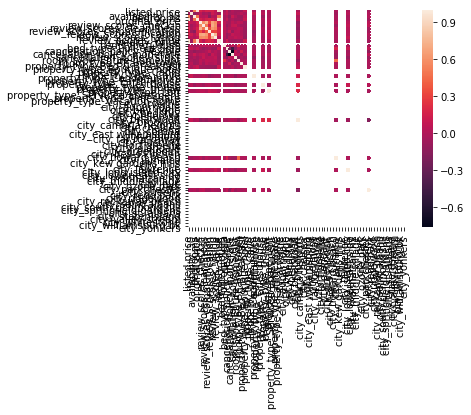

In [260]:
sns.heatmap(cor, square = True, xticklabels=True, yticklabels=True)
plt.show()

In [268]:
# Checking for high correlation coefficients > 0.75
for i in cor.keys():
    for j in cor.keys():
        if cor[i][j] > 0.75 and cor[i][j] <1 and i < j:
            print (cor[i][j], '=','cor('+i,',',j+')')

0.9649533332085987 = cor(listed price , original price)
0.9372845122951854 = cor(listed price , weekly_price)
0.9423587523184067 = cor(original price , weekly_price)
0.7617685161167237 = cor(review_scores_rating , review_scores_value)


In [267]:
df.describe

,available
count,35337
unique,2
top,t
freq,19192


# Modelling

In [219]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [220]:
# Create a 5-fold cross validation
kf = KFold(n_splits = 5, shuffle=True, random_state = 12345)

In [221]:
# For saving cross validation accuracy and confusion matrices for the different models
cv = {}
cm = {}
cma = {}
coeffs = {}
fpr = {}
tpr = {}
roc_auc = {}

In [222]:
def prediction(model, model_name, feature_weights):
    print('##### Model',model_name,'#####')

    # Cross Validation
    cv[model_name] = cross_val_score(model, # Cross-validation on model
                             X, # Feature matrix
                             y, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
    print('Report Average Cross-Validation Accuracy of',model_name+':')
    print(np.mean(cv[model_name])*100, '%')

    # Fit the model on train data
    model.fit(X=X_train, y=y_train)

    # Predict outputs for test data
    y_pred = model.predict(X_test)

    # Create confusion matrix
    cm[model_name] = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix of',model_name)
    print(cm[model_name])
    cma[model_name] = accuracy_score(y_test, y_pred)
    print("Confusion Matrix Prediction Accuracy: ", cma[model_name]*100,'%')

    # ROC and AUC
    # Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
    # model.classes_
    score = model.predict_proba(X_test)[:, 1]

    # Plot ROC Curve
    fpr[model_name], tpr[model_name], thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
    roc_auc[model_name] = auc(fpr[model_name], tpr[model_name])

    plt.plot(fpr[model_name], tpr[model_name], label='AUC =coeff %0.2f'% roc_auc[model_name])
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title('Receiver operating characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # Get feature weights
    if feature_weights:
        if feature_weights == "coeff":
            weights = pd.DataFrame(model.coef_[0])
        elif feature_weights == "features":
            weights = pd.DataFrame(model.feature_importances_)
        # Bagging method makes use of many decision trees
        elif feature_weights == "bagging":
            weights = np.mean([tree.feature_importances_ for tree in model.estimators_], axis = 0)
            weights = pd.DataFrame(weights)

        coeffs[model_name] = pd.merge(pd.DataFrame(model_features),weights, left_index=True, right_index=True, how='left')
        coeffs[model_name].columns = ['Feature', 'Weights']
        coeffs[model_name] = coeffs[model_name].sort_values(by = 'Weights')

        plt.barh(coeffs[model_name]['Feature'], coeffs[model_name]['Weights'])
        plt.title('Feature Weights')
        plt.show()

        coeffs[model_name] = coeffs[model_name].sort_values(by = 'Weights', ascending=False)
        print(coeffs[model_name])

In [223]:
def set_train_test(df, features_list, target_list):
    global X, y, X_train, X_test, y_train, y_test
    
    X = df[features_list]
    y = df[target_list[0]]

    # Do train-test split: 70% train and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [255]:
set_train_test(df, features_list, target_list)

## Univariate feature selection

In [256]:
df.isnull().sum()

date                           0
available                      0
metro_area                     0
amenities                      0
host_id                        0
instant_bookable               0
latitude                       0
longitude                      0
metropolitan                   0
name                           0
state                          0
zipcode                        0
listed price                   0
accommodates                   0
availability_30                0
bathrooms                      0
bedrooms                       0
beds                           0
original price                 0
review_scores_checkin          0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_rating           0
review_scores_value            0
weekly_price                   0
bed_type_Airbed                0
bed_type_Couch                 0
bed_type_Futon                 0
bed_type_Pull-out Sofa         0
          

In [216]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [257]:
select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(X,y)

In [258]:
score = pd.DataFrame({"features":features_list,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)
score

,features,scores,p_values
16,room_type_Entire home/apt,310.997215,1.324309e-69
13,cancellation_policy_flexible,242.187210,1.311611e-54
61,city_queens,217.441171,3.269971e-49
15,cancellation_policy_strict,213.904918,1.931790e-48
14,cancellation_policy_moderate,212.640773,3.645363e-48
25,property_type_House,209.626836,1.656837e-47
17,room_type_Shared room,146.074473,1.250433e-33
54,city_long island city,115.237183,6.982599e-27
19,property_type_Boutique hotel,103.472020,2.640977e-24
37,city_brooklyn,90.929563,1.488786e-21
